In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

(-0.5, 639.5, 479.5, -0.5)

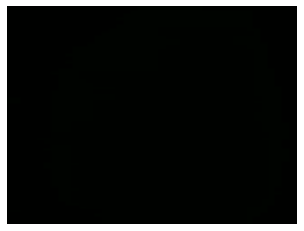

In [3]:
webcam = cv2.VideoCapture(0)
_, img = webcam.read()

webcam.release()
cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [7]:
# Function to detect face
def detect_face(img):
    '''
    Input   : An image
    Output  : Image with bounding box around faces
    '''
    # img = cv2.imread(image_path)                              # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                # convert to rgb
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)          # create a grayscale version of image
    
    # Create a cascade classifier and use detect multiscale function
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
    
    # draw the bounding boxes
    for x,y,w,h in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 10)
        
    return img

(-0.5, 639.5, 479.5, -0.5)

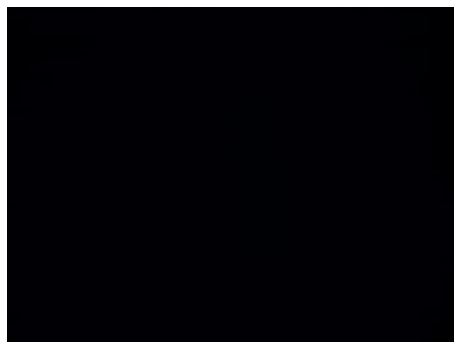

In [8]:
# Capturing and detecting image
webcam = cv2.VideoCapture(0)
_, img = webcam.read()

webcam.release()
cv2.destroyAllWindows()

image = detect_face(img)

plt.figure(figsize = (8,8))
plt.imshow(image)
plt.axis('off')

In [9]:
# Capturing and detecting face from video
webcam = cv2.VideoCapture(0)
while True:
    _, img = webcam.read()
    image = detect_face(img)
    
    cv2.imshow('Face detction', image)
    
    key = cv2.waitKey(10)
    if key == 27:
        webcam.release()
        cv2.destroyAllWindows()
        break